In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}

In [4]:
lr = 1.0e-5
wd = 0.0
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          accumulation_steps=2,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search roberta-large, learning rate 1e-05 wd: 0.0, Lora alpha 8, rank 8


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.0939	Val Loss:	2.1234	Accuracy:	0.1686	F1:	0.0321
2 / 30: Train Loss:	1.0513	Val Loss:	2.0781	Accuracy:	0.1716	F1:	0.0559
3 / 30: Train Loss:	1.0335	Val Loss:	2.0582	Accuracy:	0.1716	F1:	0.0559
4 / 30: Train Loss:	1.0241	Val Loss:	2.0453	Accuracy:	0.1893	F1:	0.0617
5 / 30: Train Loss:	1.0141	Val Loss:	2.0320	Accuracy:	0.2308	F1:	0.0749
6 / 30: Train Loss:	1.0087	Val Loss:	2.0161	Accuracy:	0.2811	F1:	0.1164
7 / 30: Train Loss:	0.9980	Val Loss:	1.9905	Accuracy:	0.3225	F1:	0.1700
8 / 30: Train Loss:	0.9873	Val Loss:	1.9440	Accuracy:	0.3521	F1:	0.2029
9 / 30: Train Loss:	0.9553	Val Loss:	1.8440	Accuracy:	0.4231	F1:	0.2648
10 / 30: Train Loss:	0.9034	Val Loss:	1.6985	Accuracy:	0.4675	F1:	0.3016
11 / 30: Train Loss:	0.8359	Val Loss:	1.5658	Accuracy:	0.4793	F1:	0.3229
12 / 30: Train Loss:	0.7794	Val Loss:	1.4550	Accuracy:	0.4970	F1:	0.3447
13 / 30: Train Loss:	0.7107	Val Loss:	1.3694	Accuracy:	0.5089	F1:	0.3512
14 / 30: Train Loss:	0.6733	Val Loss:	1.3070	Accuracy:	0.532

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.0928	Val Loss:	2.1193	Accuracy:	0.1686	F1:	0.0321
2 / 30: Train Loss:	1.0496	Val Loss:	2.0756	Accuracy:	0.1657	F1:	0.0541
3 / 30: Train Loss:	1.0321	Val Loss:	2.0557	Accuracy:	0.1775	F1:	0.0577
4 / 30: Train Loss:	1.0219	Val Loss:	2.0407	Accuracy:	0.2071	F1:	0.0674
5 / 30: Train Loss:	1.0096	Val Loss:	2.0206	Accuracy:	0.2633	F1:	0.0969
6 / 30: Train Loss:	0.9994	Val Loss:	1.9836	Accuracy:	0.3314	F1:	0.1696
7 / 30: Train Loss:	0.9721	Val Loss:	1.8887	Accuracy:	0.4053	F1:	0.2540
8 / 30: Train Loss:	0.9245	Val Loss:	1.7214	Accuracy:	0.4379	F1:	0.2728
9 / 30: Train Loss:	0.8323	Val Loss:	1.5313	Accuracy:	0.4793	F1:	0.3234
10 / 30: Train Loss:	0.7405	Val Loss:	1.4054	Accuracy:	0.5148	F1:	0.3554
11 / 30: Train Loss:	0.6706	Val Loss:	1.3126	Accuracy:	0.5621	F1:	0.3914
12 / 30: Train Loss:	0.6303	Val Loss:	1.2342	Accuracy:	0.5947	F1:	0.4203
13 / 30: Train Loss:	0.5771	Val Loss:	1.1541	Accuracy:	0.6213	F1:	0.4389
14 / 30: Train Loss:	0.5491	Val Loss:	1.0901	Accuracy:	0.642

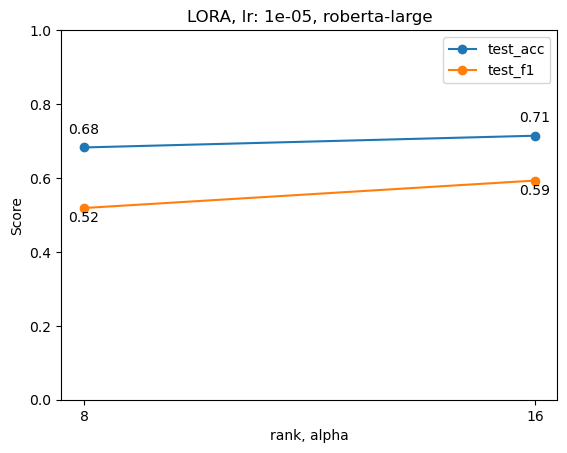

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'LORA, lr: {lr}, {model_checkpoint}',
                        column='rank, alpha',
                        sci_format=False)

In [6]:
%reset -f